# House Price Prediction Project Using Linear Regression

### Importing the required packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

### Importing a file 

In [3]:
data = pd.read_csv("/Users/prayagregmi/Downloads/HousePriceIndia.csv")

### Checking if the data has been loaded successfully or not

In [4]:
df = data.drop('id', axis=1)
data = df.drop('Date', axis=1)

In [5]:
data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


### Getting the information about columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

### Checking if any columns has missing datas

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [9]:
correlation = data.corr(method='pearson', numeric_only=True)

In [10]:
correlation.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,...,0.152954,0.016132,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,...,0.498127,0.049669,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,...,0.309602,0.059400,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,...,0.051615,0.006848,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,...,0.481565,0.006705,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732


Text(0.5, 1.0, 'Correlation Heatmap')

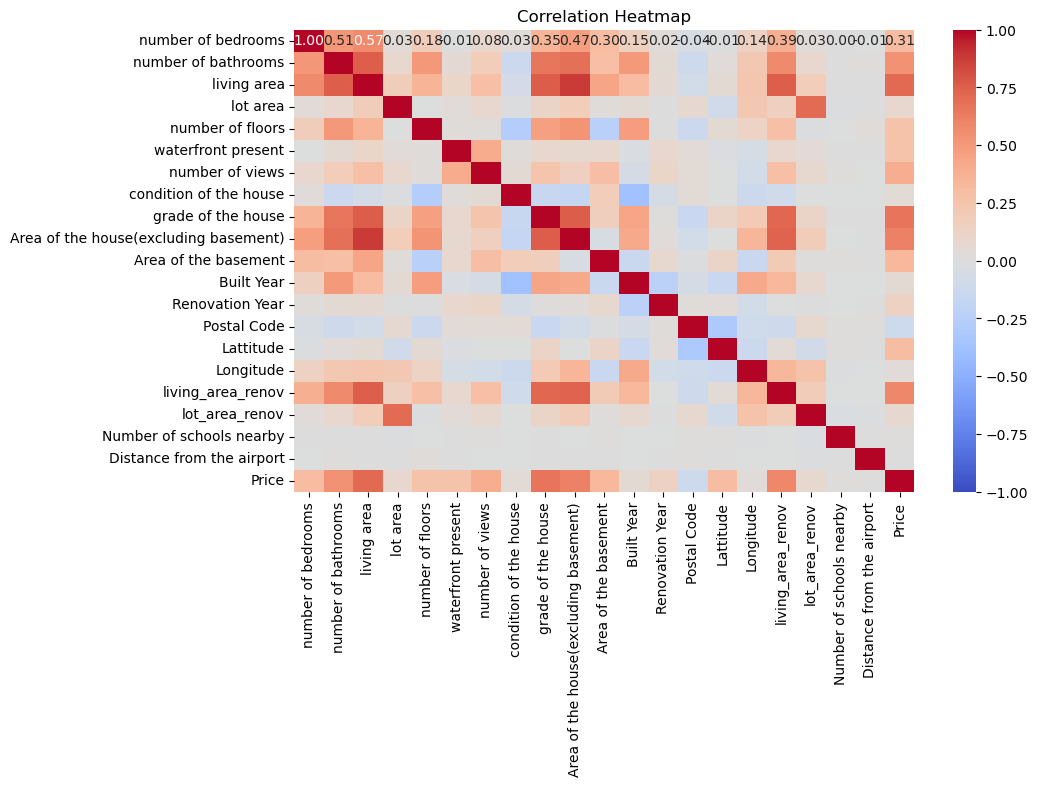

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

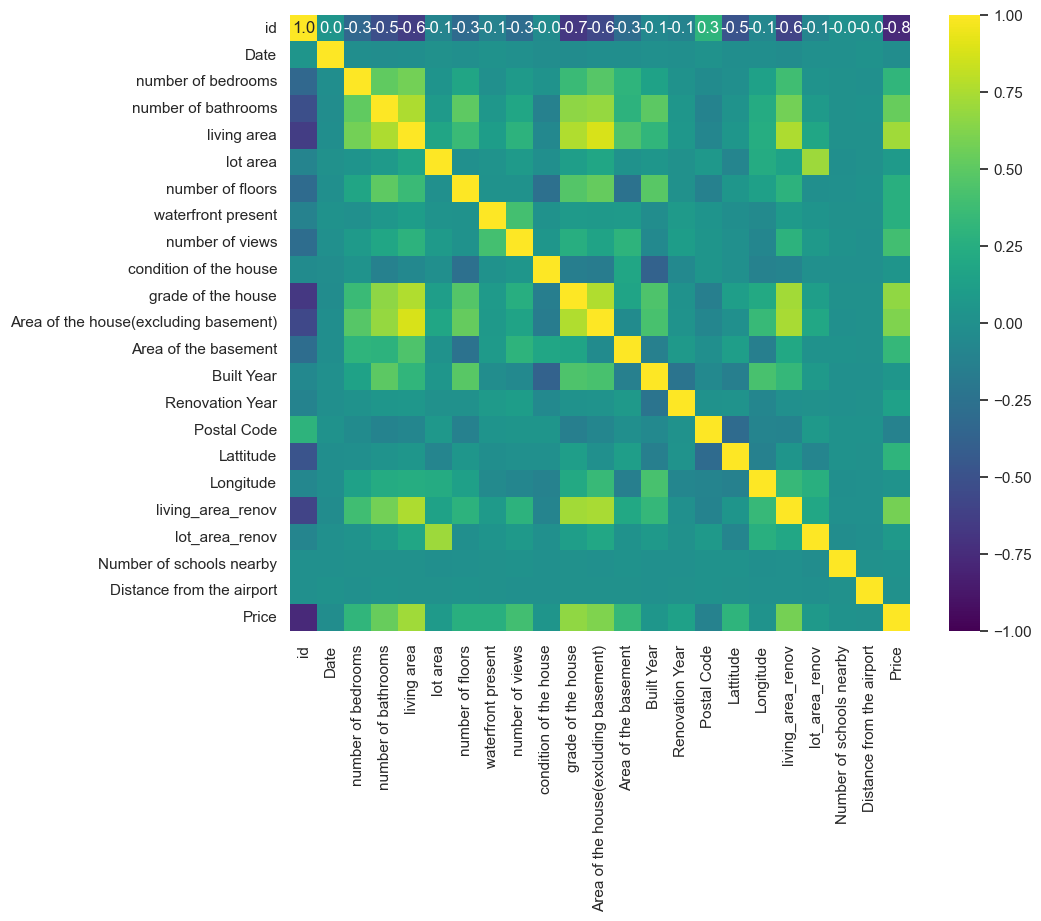

In [45]:
# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.1f', vmin=-1, vmax=1);
plt.show()

# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)

Correlation matrix:
      A    B    C
A  1.0 -1.0  1.0
B -1.0  1.0 -1.0
C  1.0 -1.0  1.0


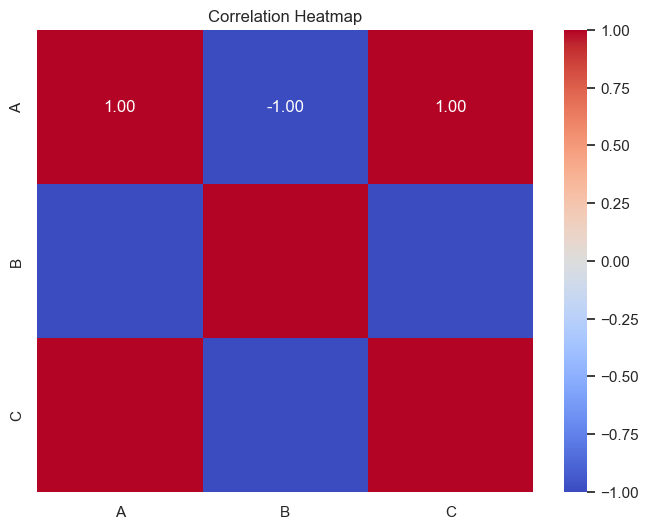

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (Replace with your actual data)
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
})

# Calculate correlation matrix
correlation = data.corr(method='pearson')

# Print correlation matrix to verify
print("Correlation matrix:\n", correlation)

# Check for missing values in the correlation matrix
if correlation.isna().sum().sum() > 0:
    print("There are missing values in the correlation matrix. Handling missing values...")
    correlation = correlation.fillna(0)  # Replace NaNs with 0s or handle them as needed

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [48]:
data

,A,B,C
0,1,5,2
1,2,4,3
2,3,3,4
3,4,2,5
4,5,1,6


In [ ]:
print(data.describe())

In [ ]:
correlation = data.corr(method='pearson')
print(correlation)

Original DataFrame:
    A  B  C
0  1  5  2
1  2  4  3
2  3  3  4
3  4  2  5
4  5  1  6
DataFrame with only numeric columns:
    A  B  C
0  1  5  2
1  2  4  3
2  3  3  4
3  4  2  5
4  5  1  6
DataFrame after handling missing values:
    A  B  C
0  1  5  2
1  2  4  3
2  3  3  4
3  4  2  5
4  5  1  6
Correlation matrix:
      A    B    C
A  1.0 -1.0  1.0
B -1.0  1.0 -1.0
C  1.0 -1.0  1.0


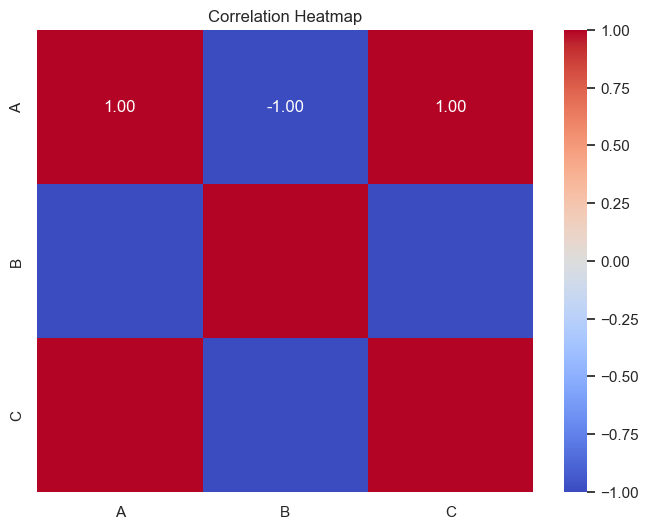

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (Replace with your actual data)
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
})

# Print the DataFrame
print("Original DataFrame:\n", data)

# Ensure all columns are numeric
data = data.select_dtypes(include=[np.number])
print("DataFrame with only numeric columns:\n", data)

# Handle missing values
data = data.fillna(data.mean())  # or data.dropna()
print("DataFrame after handling missing values:\n", data)

# Calculate correlation matrix
correlation = data.corr(method='pearson')
print("Correlation matrix:\n", correlation)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
